In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x
model=Model()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('iris.csv')

In [8]:
df['Species']=df['Species'].replace('Iris-setosa',0.0)
df['Species']=df['Species'].replace('Iris-versicolor',1.0)
df['Species']=df['Species'].replace('Iris-virginica',2.0)

In [9]:
X=df.drop('Species',axis=1)
y=df['Species']

In [10]:
X=X.values
y=y.values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [12]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [16]:
X_train.shape

torch.Size([120, 5])

In [17]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(5, 16) 
        self.fc2 = nn.Linear(16, 8)    
        self.out = nn.Linear(8, 3)     
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [18]:
model=Model()

In [20]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
epochs=100
losses=[]
for i in range(epochs):
    y_pred=model(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f'Epoch:{i} and loss:{loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss:1.4038892984390259
Epoch:10 and loss:0.8516011834144592
Epoch:20 and loss:0.6260815858840942
Epoch:30 and loss:0.4185355007648468
Epoch:40 and loss:0.27698054909706116
Epoch:50 and loss:0.18775354325771332
Epoch:60 and loss:0.12878303229808807
Epoch:70 and loss:0.08555824309587479
Epoch:80 and loss:0.0553688183426857
Epoch:90 and loss:0.036332305520772934


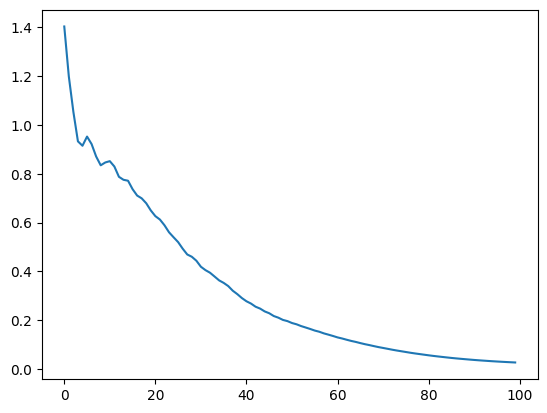

In [21]:
plt.plot(range(epochs),losses)
plt.xlabel='Epoch'
plt.ylabel='Loss'

In [25]:
from sklearn.metrics import accuracy_score
test_losses=[]
test_accuracies = []
for epoch in range(epochs):
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_losses.append(test_loss.item())

        _, test_predicted = torch.max(y_test_pred, 1)
        test_acc = accuracy_score(y_test.cpu(), test_predicted.cpu())
        test_accuracies.append(test_acc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}:")
        print(f"Test Loss: {test_loss.item():.4f}")
        print(f"Test Acc: {test_acc:.4f}")

Epoch 0:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 10:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 20:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 30:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 40:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 50:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 60:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 70:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 80:
Test Loss: 0.0589
Test Acc: 1.0000
Epoch 90:
Test Loss: 0.0589
Test Acc: 1.0000


TypeError: 'str' object is not callable

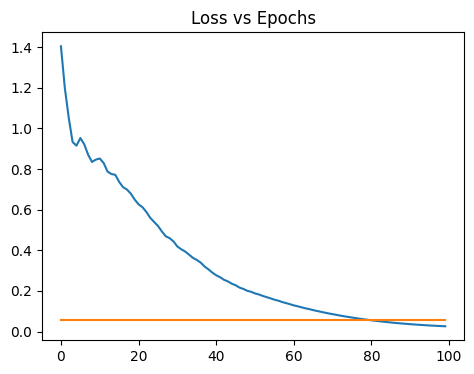

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test.cpu(), test_predicted.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
